In [1]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

## Cargando dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


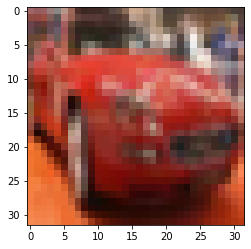

In [4]:
plt.imshow(x_train[5])

## Data Cleaning

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
num_clases = len(np.unique(y_train))
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Normalization

In [8]:
mean = np.mean(x_train)
std = np.std(x_train)

In [9]:
x_train = (x_train - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

## Creation of the data set

In [10]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape', x_train.shape)

print('train;', x_train.shape[0])
print('val;', x_valid.shape[0])
print('test;', x_test.shape[0])

x_train shape (45000, 32, 32, 3)
train; 45000
val; 5000
test; 10000


## Construction of the convolutional model

In [11]:
base_filtros = 32
w_regulatizer = 1e-4

In [12]:
x_train.shape[1:]

(32, 32, 3)

In [13]:
model = Sequential()
## conv 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())


## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

## Clasificacion - Flatten

model.add(Flatten())
model.add(Dense(num_clases,activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

## Data augmentation

In [14]:
datagen = ImageDataGenerator(rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip=True,
                  vertical_flip=True)

In [15]:
from tensorflow.keras import optimizers

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

## Callbacks

In [17]:
chekcpoint = ModelCheckpoint('my_best_model.hdf5',verbose=1,save_best_only=True, monitor = 'val_accuracy')

## Entrenando nuestro modelo

In [18]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=128),
          callbacks=[chekcpoint],
          steps_per_epoch=x_train.shape[0] // 128, 
          epochs=120,
          verbose=2,
          validation_data=(x_valid, y_valid)
         )

Epoch 1/120

Epoch 1: val_accuracy improved from -inf to 0.24180, saving model to mi_mejor_modelo.hdf5
351/351 - 34s - loss: 2.2272 - accuracy: 0.3231 - val_loss: 2.5760 - val_accuracy: 0.2418 - 34s/epoch - 96ms/step
Epoch 2/120

Epoch 2: val_accuracy improved from 0.24180 to 0.45200, saving model to mi_mejor_modelo.hdf5
351/351 - 20s - loss: 1.7132 - accuracy: 0.4345 - val_loss: 1.6373 - val_accuracy: 0.4520 - 20s/epoch - 56ms/step
Epoch 3/120

Epoch 3: val_accuracy improved from 0.45200 to 0.50920, saving model to mi_mejor_modelo.hdf5
351/351 - 19s - loss: 1.5171 - accuracy: 0.5017 - val_loss: 1.5846 - val_accuracy: 0.5092 - 19s/epoch - 55ms/step
Epoch 4/120

Epoch 4: val_accuracy improved from 0.50920 to 0.56800, saving model to mi_mejor_modelo.hdf5
351/351 - 19s - loss: 1.3878 - accuracy: 0.5445 - val_loss: 1.3641 - val_accuracy: 0.5680 - 19s/epoch - 55ms/step
Epoch 5/120

Epoch 5: val_accuracy improved from 0.56800 to 0.60280, saving model to mi_mejor_modelo.hdf5
351/351 - 19s - l

## Results

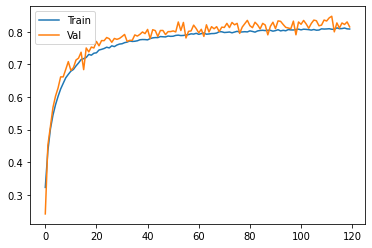

In [19]:
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

In [20]:
model2 = model

In [22]:
model2.load_weights('./my_best_model.hdf5')

In [23]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.6656 - accuracy: 0.8292


[0.6656149625778198, 0.829200029373169]